In medicine, TPA stands for Tissue Plasminogen Activator. It is a protein that plays a crucial role in the breakdown of blood clots. In the medical field, TPA is used as a medication to treat certain conditions that are caused by blood clots. For example, it is used to treat ischemic stroke, which occurs when a blood clot blocks an artery in the brain, cutting off blood flow and causing brain damage. TPA can help dissolve the clot and restore blood flow, reducing the extent of brain damage.

At this chapter of the code, we'll examine the information gathered at a hospital emergency room in Iran.
The primary challenge in this review is cleaning up dirty data. The necessary prediction has then been generated thanks to the vast characteristics of dimensionality reduction approaches and, lastly, by employing the best machine learning techniques.

In [ ]:
import pandas as pd


data = pd.read_excel('/content/drive/MyDrive/Shahed_University/DataSets/Final_TPA_data.xlsx',
                     header=0, dtype={'Date stroke': 'datetime64[ns]'})

data_shape = data.shape
print("Data Shape : ", data.shape)
data.head(2)

Data Shape :  (418, 56)


,ID,Center,Date stroke,Age,Sex,TPADosage,Weight,DNT,NIHSSadoin,NIHSS3cat,...,COVID19,Drug,Drug1,lengthHospit,Hemorrhagic1,Grad Hemorrhagic,HTI,TO,cc,dd
0,1.0,1.0,2020-03-06,69.0,1.0,50,73,9.0,2.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,2020-03-06,51.0,2.0,50,63,23,7.0,1.0,...,0.0,NaN,NaN,1.0,0.0,NaN,0.0,NaN,NaN,NaN


In [ ]:
def plt_data(data, isnull, col_name, num=20):
  fig = plt.figure(figsize = (num, 5))

  isnull_no_0 = [isnull[i] for i in range(len(isnull)) if isnull[i] > 0]
  col_name_no_0 = [col_name[i] for i in range(len(isnull)) if isnull[i] > 0]

  plt.bar(col_name_no_0, isnull_no_0, color='darkgreen')

  plt.xticks(rotation=90)
  plt.xlabel("Columns name", fontweight='bold')
  plt.ylabel("No. of missing values", fontweight='bold')
  plt.title("Number of missing values in all columns", fontweight='bold')

  for i in range(len(col_name_no_0)):
    plt.text(i, isnull_no_0[i], isnull_no_0[i], ha = 'center')

  plt.show()

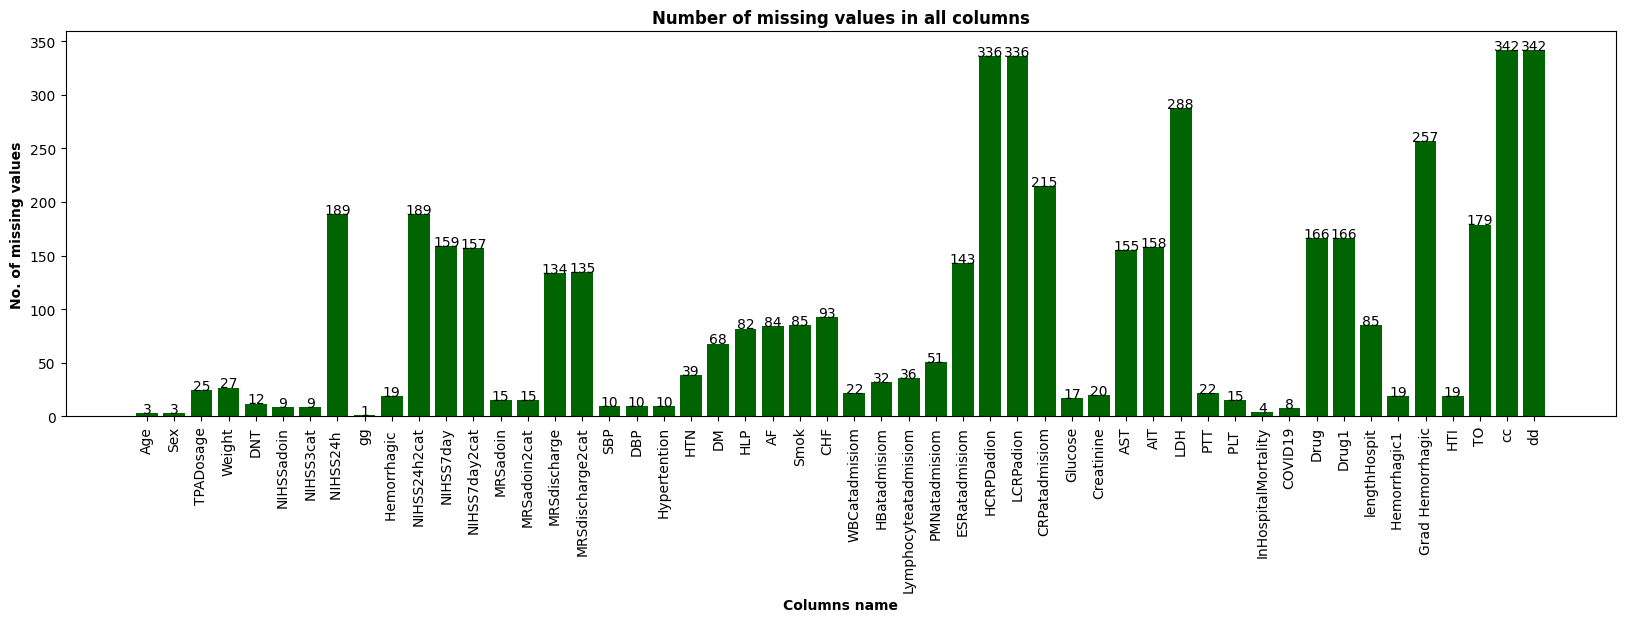

In [ ]:
import matplotlib.pyplot as plt


eye_remove = ['ID', 'Center', 'Date stroke', 'Dischargedate']
data.drop(eye_remove, axis=1, inplace=True)
data.drop_duplicates(inplace=True)

isnull = list(data.isnull().sum())
col_name = list(data.columns)
plt_data(data, isnull, col_name)

Data Frame Shape (befor del missing > 28) :  (418, 56)
Data Frame Shape (after del missing > 28) :  (418, 23)


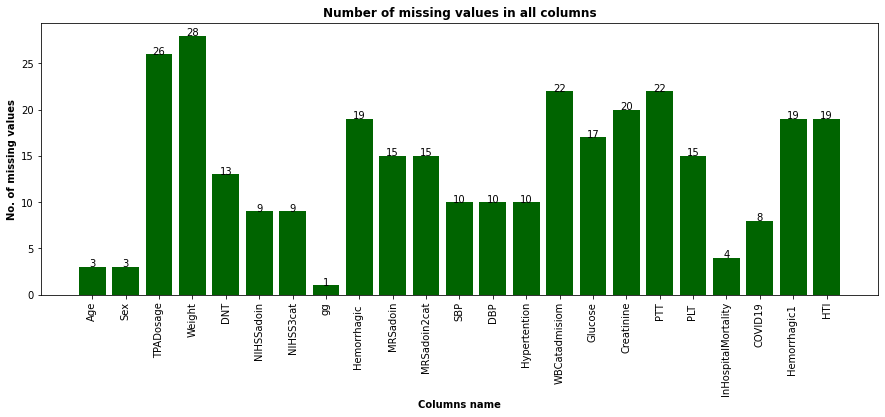

In [ ]:
num_missing = 28

print('Data Frame Shape (befor del missing > '+str(num_missing)+') : ', data_shape)

col_del = [col_name[i] for i in range(len(isnull)) if isnull[i] > num_missing]
data.drop(col_del, axis=1, inplace=True)

print('Data Frame Shape (after del missing > '+str(num_missing)+') : ', data.shape)

isnull = list(data.isnull().sum())
col_name = list(data.columns)
plt_data(data, isnull, col_name, 15)

Data Frame Shape (befor remove HTI missing value in row) :  (418, 23)
Data Frame Shape (after remove HTI missing value in row) :  (399, 23)


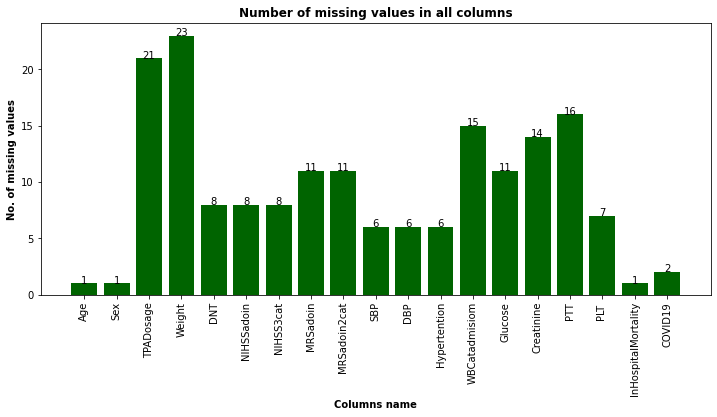

In [ ]:
print('Data Frame Shape (befor remove HTI missing value in row) : ', data.shape)
data.dropna(subset=['HTI'], inplace=True)
print('Data Frame Shape (after remove HTI missing value in row) : ', data.shape)

isnull = list(data.isnull().sum())
col_name = list(data.columns)
plt_data(data, isnull, col_name, 12)

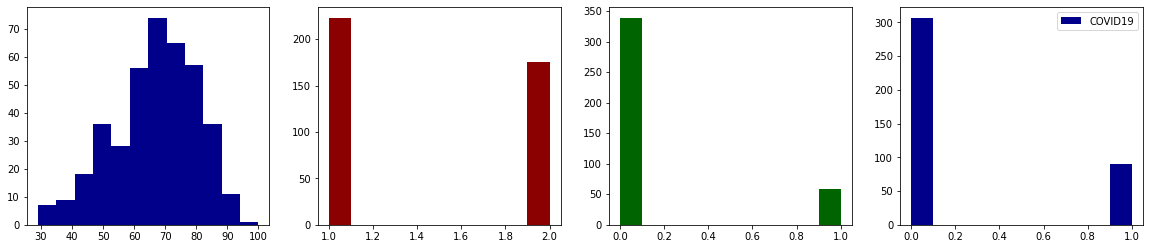

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (20, 4))

plt.subplot(1, 4, 1)
plt.hist(data['Age'], 12, color='darkblue', label='Age')

plt.subplot(1, 4, 2)
plt.hist(data['Sex'], color='darkred', label='Sex')

plt.subplot(1, 4, 3)
plt.hist(data['InHospitalMortality'], color='darkgreen', label='InHospitalMortality')

plt.subplot(1, 4, 4)
plt.hist(data['COVID19'], color='darkblue', label='COVID19')

plt.legend()
plt.show()

In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Sex'].fillna(1, inplace=True)
data['InHospitalMortality'].fillna(0, inplace=True)
data['COVID19'].fillna(0, inplace=True)

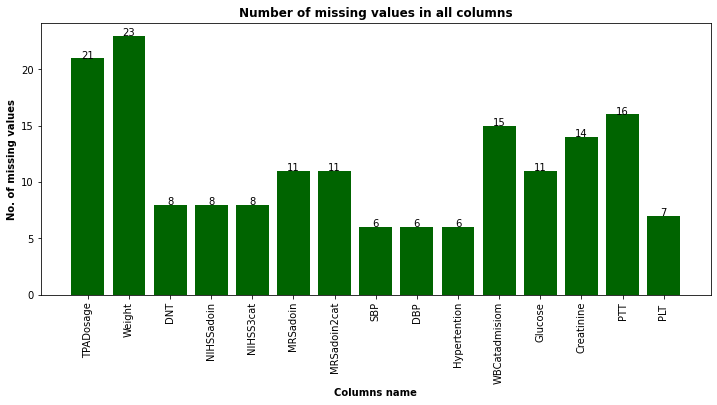

In [ ]:
isnull = list(data.isnull().sum())
col_name = list(data.columns)
plt_data(data, isnull, col_name, 12)

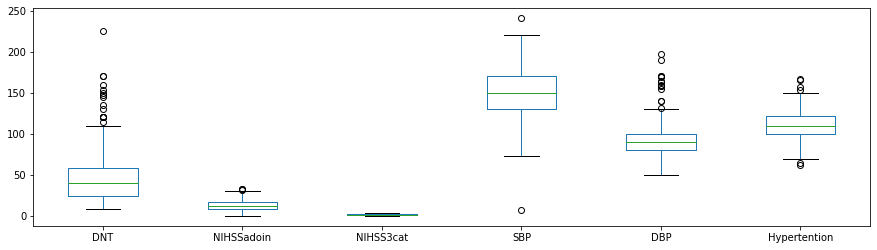

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

col = ['DNT', 'NIHSSadoin', 'NIHSS3cat', 'SBP', 'DBP', 'Hypertention']
data.boxplot(column=col, grid=False, figsize=(15, 4))
plt.show()

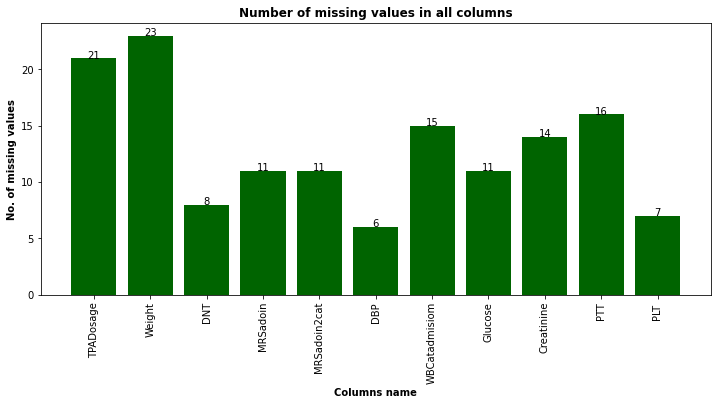

In [ ]:
data['NIHSSadoin'].fillna(data['NIHSSadoin'].mean(), inplace=True)
data['NIHSS3cat'].fillna(data['NIHSS3cat'].mean(), inplace=True)
data['SBP'].fillna(data['SBP'].median(), inplace=True)
data['Hypertention'].fillna(data['Hypertention'].median(), inplace=True)

isnull = list(data.isnull().sum())
col_name = list(data.columns)
plt_data(data, isnull, col_name, 12)

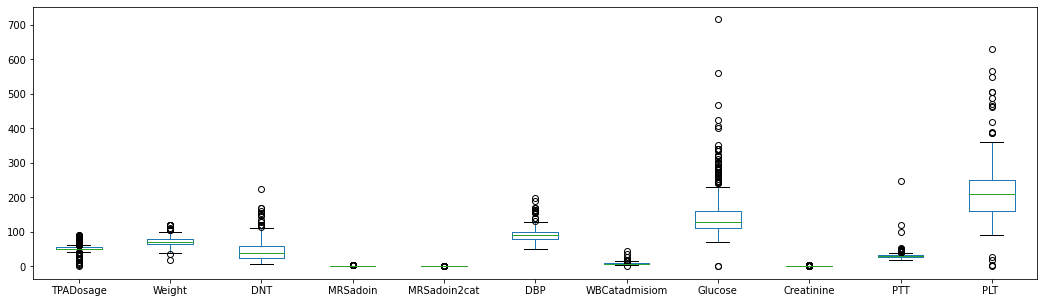

In [ ]:
col = ['TPADosage', 'Weight', 'DNT', 'MRSadoin', 'MRSadoin2cat',
       'DBP', 'WBCatadmisiom', 'Glucose', 'Creatinine', 'PTT', 'PLT ']
data.boxplot(column=col, grid=False, figsize=(18, 5))
plt.show()

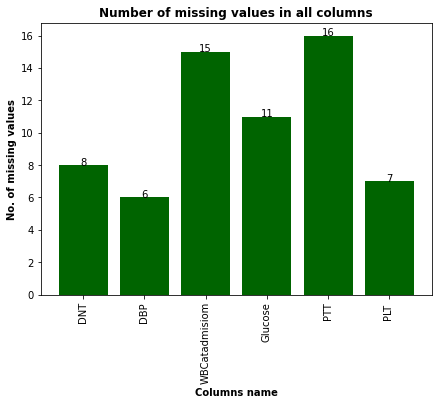

In [ ]:
data['TPADosage'].fillna(data['TPADosage'].median(), inplace=True)
data['Weight'].fillna(data['Weight'].mean(), inplace=True)
data['MRSadoin'].fillna(data['MRSadoin'].median(), inplace=True)
data['MRSadoin2cat'].fillna(data['MRSadoin2cat'].median(), inplace=True)
data['Creatinine'].fillna(data['Creatinine'].median(), inplace=True)

isnull = list(data.isnull().sum())
col_name = list(data.columns)
name_col_missing = plt_data(data, isnull, col_name, 7)

In [ ]:
data.dropna(inplace=True)

col_remaind = list(data.columns)
print('Final Rows & Cols', data.shape, '\n')
print('Name final cols :')
print(col_remaind[:11])
print(col_remaind[11:])

Final Rows & Cols (358, 23) 

Name final cols :
['Age', 'Sex', 'TPADosage', 'Weight', 'DNT', 'NIHSSadoin', 'NIHSS3cat', 'gg', 'Hemorrhagic ', 'MRSadoin', 'MRSadoin2cat']
['SBP', 'DBP', 'Hypertention', 'WBCatadmisiom', 'Glucose', 'Creatinine', 'PTT', 'PLT ', 'InHospitalMortality', 'COVID19', 'Hemorrhagic1 ', 'HTI']


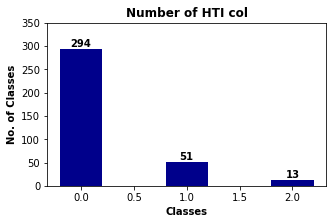

In [ ]:
fig = plt.figure(figsize = (5, 3))

dic = dict(data['HTI'].value_counts())

plt.bar(dic.keys(), dic.values(), color='darkblue', width=0.4)

plt.xlabel('Classes', fontweight='bold')
plt.ylabel("No. of Classes", fontweight='bold')
plt.title("Number of HTI col", fontweight='bold')

for i in range(len(dic.keys())):
  plt.text(i, dic[i]+5, dic[i], ha = 'center', fontweight='bold')

plt.ylim(0, 350)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

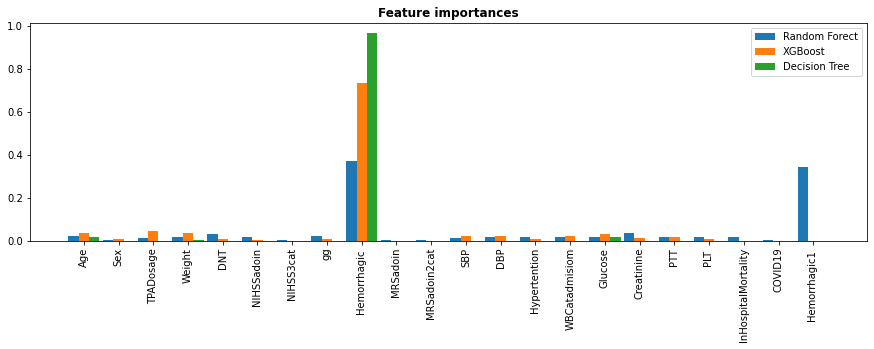

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


models = [RandomForestClassifier(), XGBClassifier(), DecisionTreeClassifier()]

fig, ax = plt.subplots(figsize = (15, 4))
ind = np.arange(22)
width = 0.3

forect = RandomForestClassifier()
forect.fit(X_scaled, y)
ax.bar(ind, forect.feature_importances_, width, label='Random Forect')

xgb = XGBClassifier()
xgb.fit(X_scaled, y)
ax.bar(ind+(width), xgb.feature_importances_, width, label='XGBoost')

tree = DecisionTreeClassifier()
tree.fit(X_scaled, y)
ax.bar(ind+(width*2), tree.feature_importances_, width, label='Decision Tree')

ax.set_xticks(ind + width)
ax.set_xticklabels(X.columns, rotation=90)
ax.set_title('Feature importances', fontweight='bold')
ax.legend()
ax.autoscale_view()

plt.show()

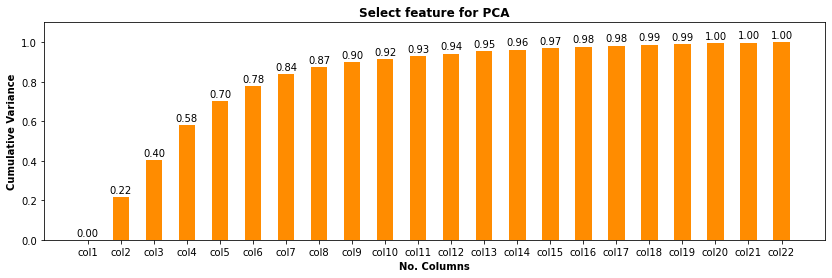

In [ ]:
from sklearn.decomposition import PCA

v = []
index = []

for i in range(X.shape[1]):
  pca = PCA(n_components=i)
  pca.fit(X_scaled)
  var = pca.explained_variance_ratio_
  #print(i+1, ':%.2f' %var.sum(), end=', ')
  v.append(var.sum())
  index.append('col{i}'.format(i=i+1))

fig = plt.figure(figsize = (14, 4))
plt.bar(index, v, color='darkorange', width=0.5)

plt.xlabel('No. Columns', fontweight='bold')
plt.ylabel("Cumulative Variance", fontweight='bold')
plt.title("Select feature for PCA", fontweight='bold')

for j in range(len(v)):
  plt.text(j, v[j]+.02, '%.2f'%v[j], ha='center')

plt.ylim(0, 1.1)
plt.show()

In [ ]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


# acc, recall, pre, roc_auc_ovo, roc_auc_ovr = [], [], [], [], []
models = [RandomForestClassifier(n_estimators=500, max_depth=6),
          XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.001),
          DecisionTreeClassifier()]

for model in models:
  print('Model : ', model)
  print('-'*104)
  print('n Split\t\tAccuracy\t\tRecall\t\tPrecision\t\tROC ovo\t\tROC ovr')
  print('-'*104)
  for n in [3, 4, 5, 7]:
    cv = RepeatedStratifiedKFold(n_splits=n, n_repeats=3, random_state=42)
    a = cross_val_score(model, X_pca, y, scoring='accuracy', cv=cv, n_jobs=-1)
    r = cross_val_score(model, X_pca, y, scoring='recall_macro', cv=cv, n_jobs=-1)
    p = cross_val_score(model, X_pca, y, scoring='precision_macro', cv=cv, n_jobs=-1)
    r_a_ovo = cross_val_score(model, X_pca, y, scoring='roc_auc_ovo', cv=cv, n_jobs=-1)
    r_a_ovr = cross_val_score(model, X_pca, y, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
    print(' ', n,'\t\t%.3f(%.2f)\t\t%.3f(%.2f)\t%.3f(%.2f)\t\t%.3f(%.2f)\t%.3f(%.2f)'
          %(mean(a),std(a), mean(r),std(r), mean(p),std(p), mean(r_a_ovo),std(r_a_ovo), mean(r_a_ovr),std(r_a_ovr)))

  print('\n')

Model :  RandomForestClassifier(max_depth=6, n_estimators=500)
--------------------------------------------------------------------------------------------------------
n Split		Accuracy		Recall		Precision		ROC ovo		ROC ovr
--------------------------------------------------------------------------------------------------------
  3 		0.956(0.02)		0.753(0.11)	0.824(0.15)		0.936(0.04)	0.981(0.02)
  4 		0.958(0.02)		0.754(0.11)	0.810(0.17)		0.950(0.04)	0.980(0.02)
  5 		0.958(0.02)		0.751(0.12)	0.768(0.19)		0.946(0.05)	0.979(0.02)
  7 		0.966(0.03)		0.824(0.13)	0.817(0.17)		0.967(0.04)	0.985(0.03)


Model :  XGBClassifier(learning_rate=0.001, max_depth=6, n_estimators=500)
--------------------------------------------------------------------------------------------------------
n Split		Accuracy		Recall		Precision		ROC ovo		ROC ovr
--------------------------------------------------------------------------------------------------------
  3 		0.952(0.02)		0.767(0.12)	0.820(0.14)		0.936(0.05)	0.

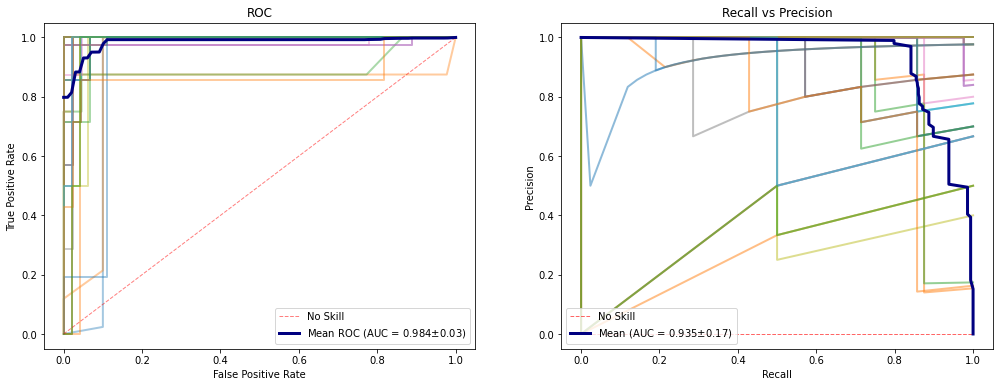

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix



figure, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6))

prs, stdprs, aucs, tprs = [], [], [], []
mean_recall = np.linspace(0, 1, 100)
mean_fpr = np.linspace(0, 1, 100)

model = RandomForestClassifier(n_estimators=500, max_depth=6)

kfold = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=42)
y =  np.array(y)

for train, test in kfold.split(X_pca, y):
  X_train, X_test = X_pca[train], X_pca[test]
  y_train, y_test = y[train], y[test]

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)
  for j in range(3):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, j], pos_label=j)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    ax1.plot(fpr, tpr, lw=2, alpha=0.4)

    precision, recall, _ = precision_recall_curve(y_test, y_prob[:, j], pos_label=j)
    prs.append(np.interp(mean_recall, precision, recall))
    pr_auc = auc(recall, precision)
    stdprs.append(pr_auc)
    ax2.plot(recall, precision, lw=2, alpha=0.5)

# ROC
ax1.plot([0,1],[0,1], linestyle = '--',lw = 1, color = 'red', label='No Skill', alpha=0.5)
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax1.plot(mean_fpr, mean_tpr, color='navy', label=r'Mean ROC (AUC = %0.3f$\pm$%0.2f)' % (mean_auc, std_auc), lw=3, alpha=1)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC')
ax1.legend(loc="best")

# Recall - Precision
ax2.plot([0, 1], [0, 0], linestyle='--', lw = 1, color='red', label='No Skill', alpha=0.6)
mean_precision = np.mean(prs, axis=0)
mean_auc = auc(mean_recall, mean_precision)
std_pr = np.std(stdprs)
ax2.plot(mean_precision, mean_recall, color='navy', label=r'Mean (AUC = %0.3f$\pm$%0.2f)' % (mean_auc, std_pr), lw=3)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Recall vs Precision')
ax2.legend(loc = 'lower left')

plt.show()

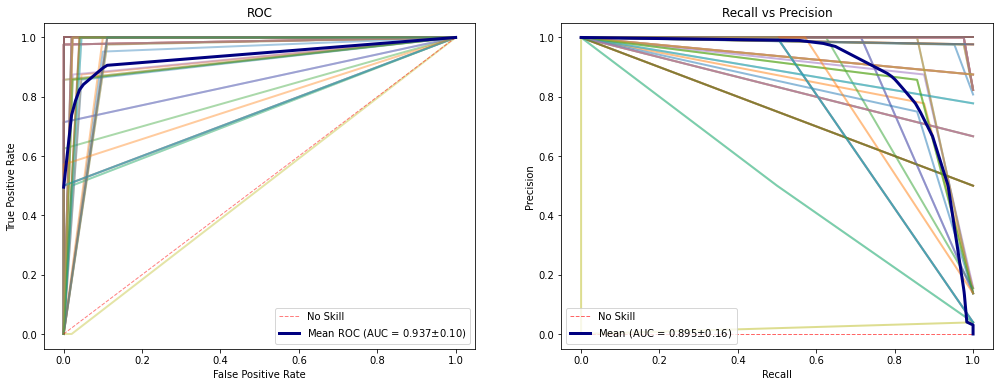

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix



figure, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6))

prs, stdprs, aucs, tprs = [], [], [], []
mean_recall = np.linspace(0, 1, 100)
mean_fpr = np.linspace(0, 1, 100)

model = DecisionTreeClassifier()

kfold = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=42)
y =  np.array(y)

for train, test in kfold.split(X_pca, y):
  X_train, X_test = X_pca[train], X_pca[test]
  y_train, y_test = y[train], y[test]

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)
  for j in range(3):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, j], pos_label=j)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    ax1.plot(fpr, tpr, lw=2, alpha=0.4)

    precision, recall, _ = precision_recall_curve(y_test, y_prob[:, j], pos_label=j)
    prs.append(np.interp(mean_recall, precision, recall))
    pr_auc = auc(recall, precision)
    stdprs.append(pr_auc)
    ax2.plot(recall, precision, lw=2, alpha=0.5)

# ROC
ax1.plot([0,1],[0,1], linestyle = '--',lw = 1, color = 'red', label='No Skill', alpha=0.5)
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax1.plot(mean_fpr, mean_tpr, color='navy', label=r'Mean ROC (AUC = %0.3f$\pm$%0.2f)' % (mean_auc, std_auc), lw=3, alpha=1)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC')
ax1.legend(loc="best")

# Recall - Precision
ax2.plot([0, 1], [0, 0], linestyle='--', lw = 1, color='red', label='No Skill', alpha=0.6)
mean_precision = np.mean(prs, axis=0)
mean_auc = auc(mean_recall, mean_precision)
std_pr = np.std(stdprs)
ax2.plot(mean_precision, mean_recall, color='navy', label=r'Mean (AUC = %0.3f$\pm$%0.2f)' % (mean_auc, std_pr), lw=3)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Recall vs Precision')
ax2.legend(loc = 'lower left')

plt.show()